In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.utils import shuffle


In [ ]:
!wget http://www.keshavmaheshwari.us/images/water_potability.csv

--2021-07-01 15:56:12--  http://www.keshavmaheshwari.us/images/water_potability.csv
Resolving www.keshavmaheshwari.us (www.keshavmaheshwari.us)... 54.161.241.46, 18.205.222.128, 52.202.168.65, ...
Connecting to www.keshavmaheshwari.us (www.keshavmaheshwari.us)|54.161.241.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525187 (513K) [text/csv]
Saving to: ‘water_potability.csv’

water_potability.cs 100%[===================>] 512.88K   283KB/s    in 1.8s    

2021-07-01 15:56:14 (283 KB/s) - ‘water_potability.csv’ saved [525187/525187]



In [ ]:
water_data = pd.read_csv('water_potability.csv')
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
def impute_missing_data(data):
  # split into 1/0
  data_pos = data[data['Potability'] == 1]
  data_neg = data[data['Potability'] == 0]

  # col:
  col = list(data.columns)

  # fill missing data
  for i in range(len(data.columns)-1):
    data_pos[col[i]] = data_pos[col[i]].fillna(value=data_pos[col[i]].mean())
    data_neg[col[i]] = data_neg[col[i]].fillna(value=data_neg[col[i]].mean())

    # combine data
    data_fill = pd.concat([data_pos, data_neg], ignore_index=True)

  return data_fill

In [ ]:
data = impute_missing_data(water_data)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
2,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,0
3272,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,0
3273,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3274,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [ ]:
svm_map = {1: 1.0, 0: -1.0}
data['Potability'] = data['Potability'].map(svm_map)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1.0
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1.0
2,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1.0
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1.0
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1.0
...,...,...,...,...,...,...,...,...,...,...
3271,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,-1.0
3272,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,-1.0
3273,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,-1.0
3274,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,-1.0


In [ ]:
Y = data.loc[:, 'Potability']
X = data.iloc[:, :-1]

In [ ]:
X_norm = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_norm)

In [ ]:
X.insert(loc=len(X.columns), column='intercept', value=1)
X

,0,1,2,3,4,5,6,7,8,intercept
0,0.674652,0.356824,0.210940,0.711739,0.515817,0.719015,0.245456,0.623383,0.458530,1
1,0.644632,0.292590,0.320800,0.599955,0.486180,0.471549,0.481642,0.592559,0.479344,1
2,0.505270,0.444492,0.378987,0.639353,0.578265,0.514270,0.410885,0.406645,0.245285,1
3,0.485723,0.705773,0.637413,0.716219,0.165243,0.340946,0.353734,0.592553,0.454706,1
4,0.512438,0.565765,0.329690,0.573762,0.449068,0.234439,0.472548,0.597651,0.470769,1
...,...,...,...,...,...,...,...,...,...,...
3271,0.472624,0.535616,0.557526,0.569913,0.583939,0.412657,0.430366,0.382989,0.410735,1
3272,0.552469,0.665553,0.352273,0.513236,0.583939,0.373573,0.491707,0.746048,0.448375,1
3273,0.497970,0.502281,0.453797,0.537183,0.627059,0.406715,0.677506,0.287526,0.335857,1
3274,0.336370,0.477740,0.360726,0.502722,0.790891,0.331867,0.612521,0.696002,0.455679,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
def cost_func(W, X, Y):
  reg_strength = 1000
  distances = 1 - Y * (np.dot(X, W))
  distances[distances < 0] = 0
  loss = reg_strength * (np.sum(distances) / X.shape[0])

  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + loss
  return cost

In [ ]:
def gradient(W, X, Y):
  if type(Y) == np.float64:
    Y = np.array([Y])
    X = np.array([X])

  reg_strength = 1000
  distance = 1 - (Y * np.dot(X, W))
  dw = np.zeros(len(W))

  for idx, d in enumerate(distance):
    if max(0, d) == 0:
      di = W
    else:
      di = W - (reg_strength * Y[idx] * X[idx])
    dw += di

  dw = dw/len(Y)

  return dw

In [ ]:
def SGD(features, labels):
  epochs = 5000
  weights = np.zeros(features.shape[1])
  nth = 0
  prev_cost = float("inf")
  cost_threshold = 0.01
  learning_rate = 0.00001

  # stochastic gradient descent
  for epoch in range(1, epochs):
    X, Y = shuffle(features, labels)
    for idx, x in enumerate(X):
      ascent = gradient(weights, x, Y[idx])
      weights = weights - (learning_rate * ascent)

      if epoch == 2 ** nth or epoch == epochs - 1:
        cost = cost_func(weights, features, labels)
        # print("Epoch is: {} and Cost is: {}".format(epoch, cost))

        if abs(prev_cost - cost) < cost_threshold * prev_cost:
          return weights

        prev_cost = cost
        nth += 1

    return weights

In [ ]:
W = SGD(X_train.to_numpy(), y_train.to_numpy())

In [ ]:
y_hat = np.array([])

for i in range(X_test.shape[0]):
  prediction = np.sign(np.dot(X_test.to_numpy()[i], W))
  y_hat = np.append(y_hat, prediction)

In [ ]:
def accuracy(labels, predictions):
  correct = 0

  for i in range(len(labels)):
    if list(labels)[i] == list(predictions)[i]:
      correct += 1

  return correct / len(labels)

In [ ]:
acc = accuracy(y_test, y_hat)
print("The accuracy is " + str(acc))

The accuracy is 0.6158536585365854


In [ ]:
print(y_test)
print(y_hat)

2731   -1.0
1010    1.0
300     1.0
120     1.0
3246   -1.0
       ... 
1776   -1.0
1957   -1.0
2025   -1.0
1956   -1.0
486     1.0
Name: Potability, Length: 656, dtype: float64
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1

In [ ]:
print(accuracy_score(y_test, y_hat))
print(recall_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(f1_score(y_test, y_hat))

0.6158536585365854
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


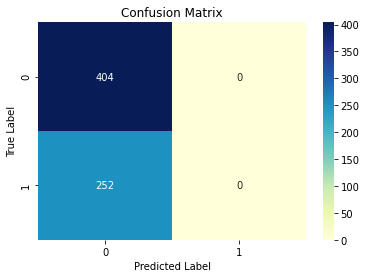

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_hat),
           annot=True,fmt="d",
           cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');